# **<p style="font-family:newtimeroman;font-size:200%;text-align:center;color:#06445e;">Customer Segmentation </p>**

# Unsupervised Machine learning project

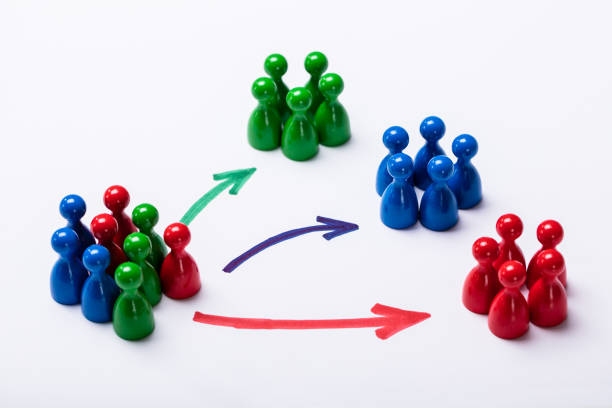

In [28]:
from PIL import Image
from IPython.display import display

# Open an image file
image = Image.open("download.jpg")

# Display the image
display(image)

# **Step 1:** **Understanding the Business Requirement:**

- Understand the target customers for the marketing team to plan a strategy
- Identify the most important shopping groups based on income, age, and the mall shopping score
- **Objective marketing Segmentation :**- Divide your mall target market into approachable groups.Create subsets of a market based on demographics behavioral criteria to better understand the target for marketing activities

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv("Mall_Customers (1).csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Step 2: Data Understanding**

In [31]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# **Step 3: Exploratory Data Analysis (EDA)**

### *Understanding each variable*

In [33]:
print(df["Gender"].unique())
print(df["Gender"].value_counts()/200*100)

['Male' 'Female']
Gender
Female    56.0
Male      44.0
Name: count, dtype: float64


In [34]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### **Univariate Analysis**

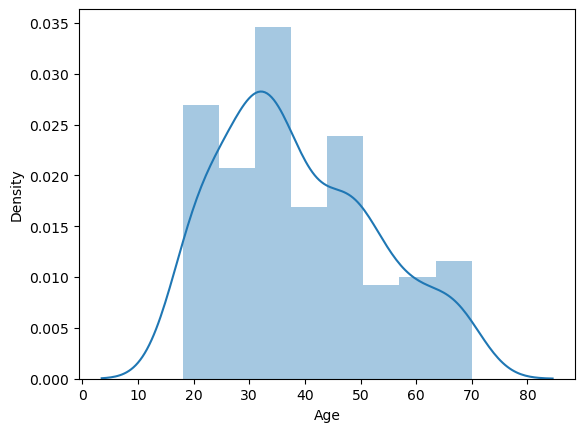

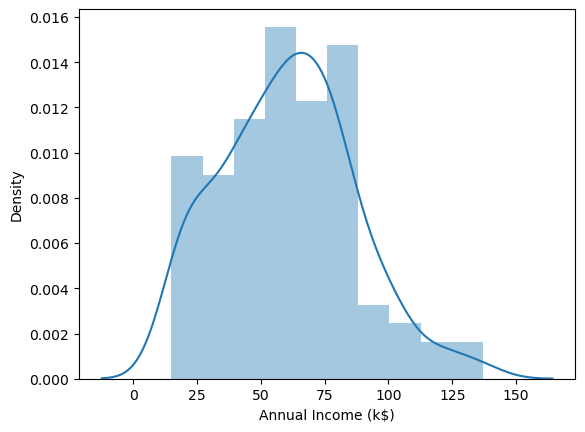

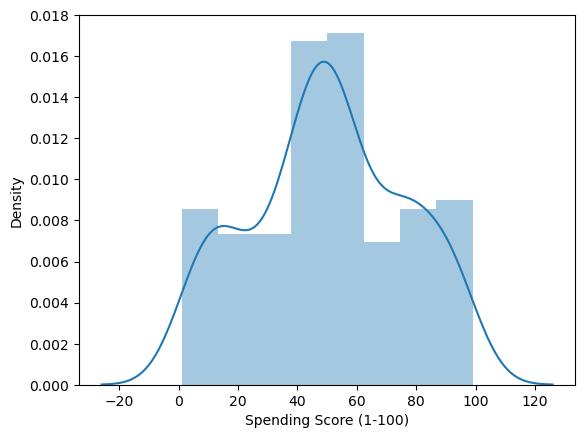

In [35]:
sns.distplot(df['Age'])
plt.show()
sns.distplot(df['Annual Income (k$)'])
plt.show()
sns.distplot(df['Spending Score (1-100)'])
plt.show()

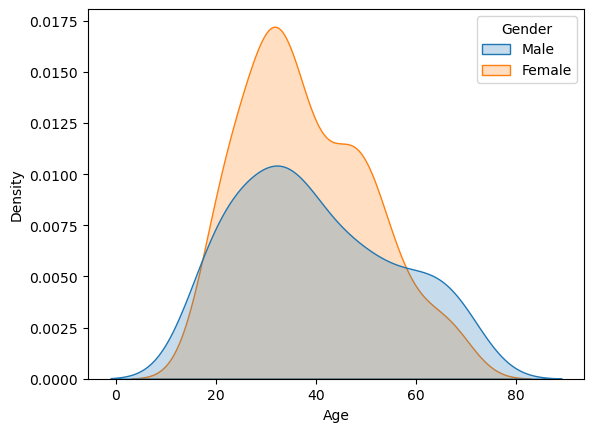

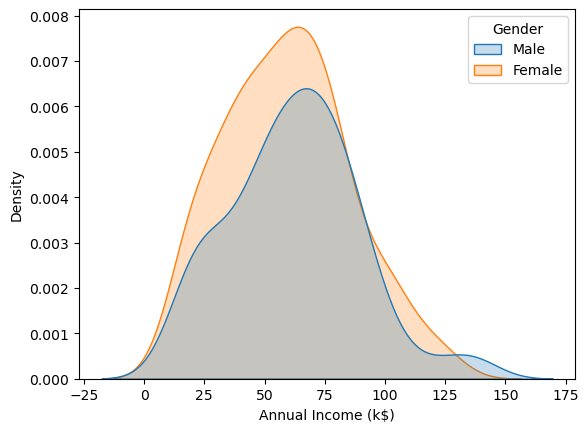

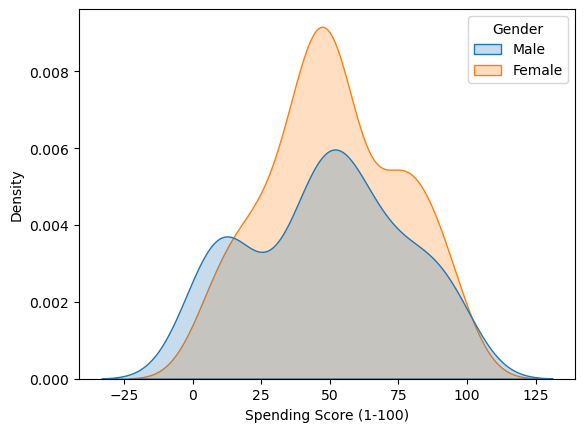

In [36]:
sns.kdeplot(data=df, x='Age', hue=df['Gender'], fill=True)
plt.show()
sns.kdeplot(data=df, x='Annual Income (k$)', hue=df['Gender'], fill=True)
plt.show()
sns.kdeplot(data=df, x='Spending Score (1-100)', hue=df['Gender'], fill=True)
plt.show()

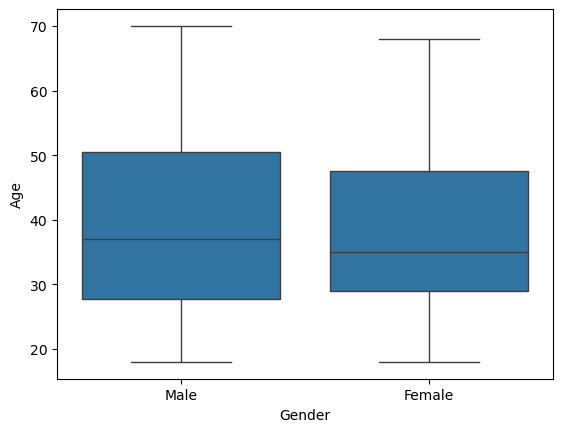

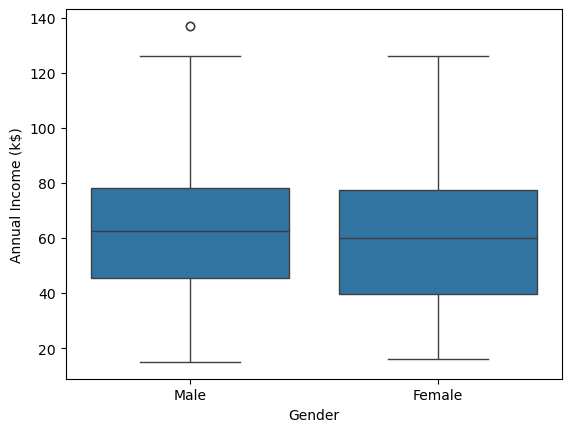

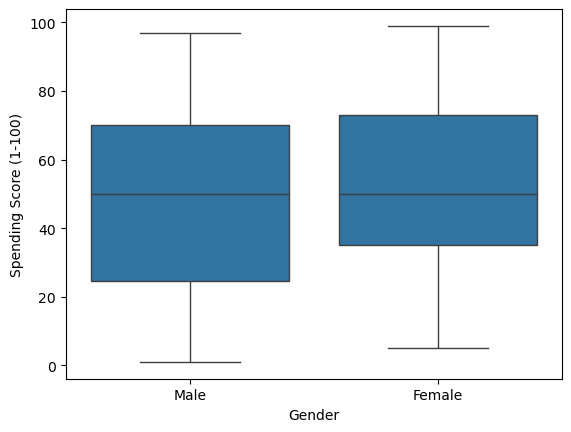

In [37]:
sns.boxplot(data=df,x='Gender',y=df["Age"])
plt.show()
sns.boxplot(data=df,x='Gender',y=df["Annual Income (k$)"])
plt.show()
sns.boxplot(data=df,x='Gender',y=df["Spending Score (1-100)"])
plt.show()

### **Bi-Variate Analysis** 

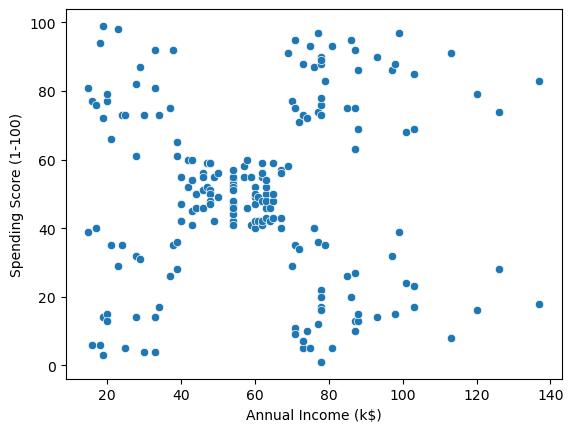

In [38]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )
plt.show()

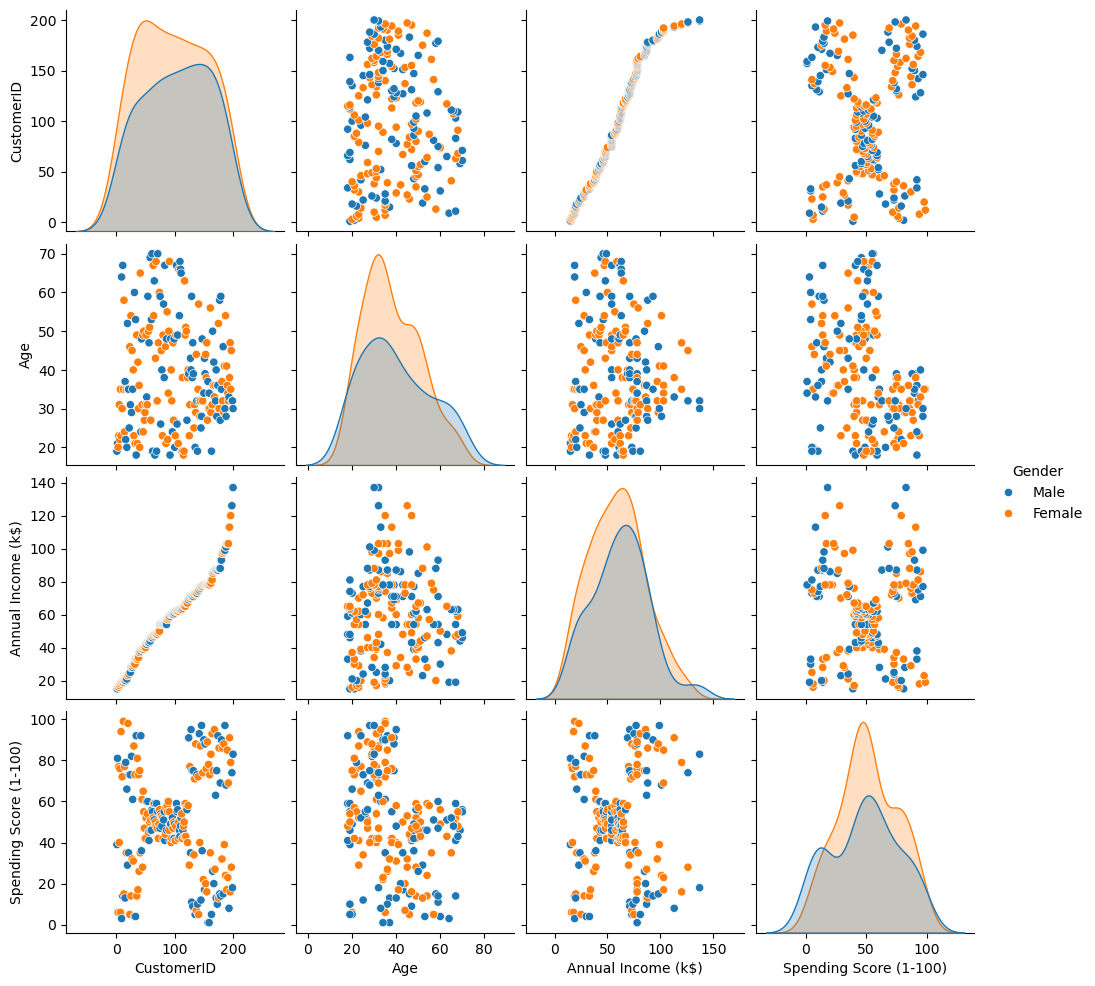

In [39]:
sns.pairplot(df,hue='Gender')
plt.show()

In [40]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [41]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


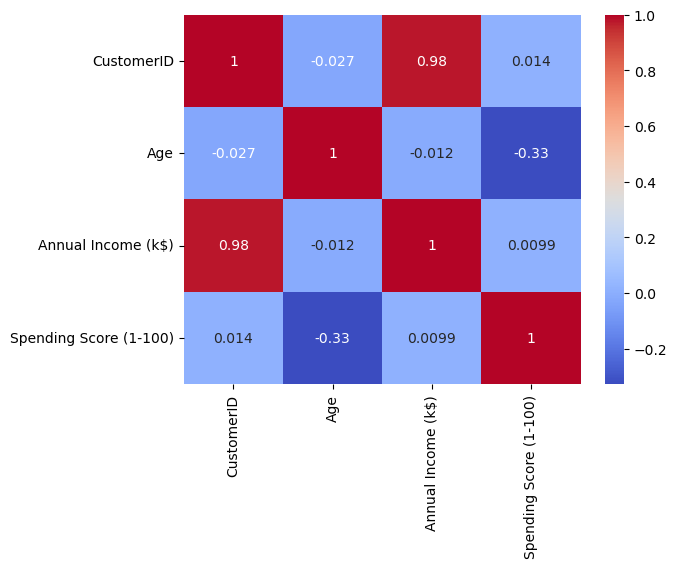

In [43]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

# **Step 4: Data preprocessing/Data Cleaning**

### *1)Checking for wrong data:* - There is no wrong data

### *2)Wrong data type:* - There is no wrong data

### *3)Duplicate Data:* - There is no Duplicate data

In [45]:
df.duplicated().sum()

0

### *4)Missing values:*- No missing values

### *5)Outliers:*- We have the outlier in Annual income but we ignore the outlier because a person can have more income than expected.

**Feature Selection**

In [46]:
df = df.drop("CustomerID", axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### **Data Wrangling**

In [47]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# **Step 5: K-Means modelling**

In [48]:
X = df.iloc[:,[2,3]].values

In [52]:
from sklearn.cluster import KMeans

[269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37265.86520484346, 30273.394312070042, 24990.4343103969, 21818.114588452183, 19785.358930316994]


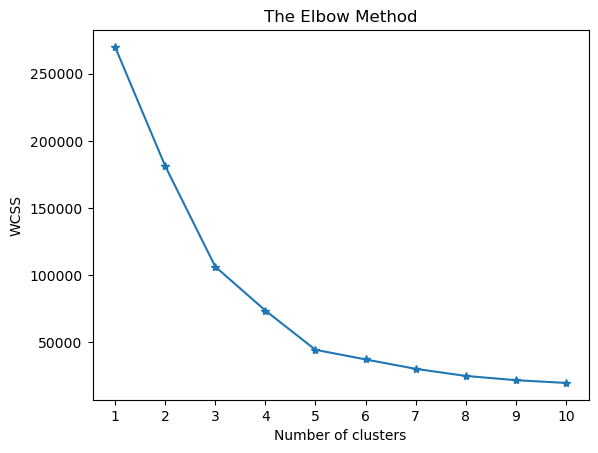

In [53]:
WCSS = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

print(WCSS)

plt.plot(range(1,11),WCSS,marker="*")
plt.xticks(range(1,11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
# Modeling
kmeans = KMeans(n_clusters = 5, init = 'k-means++',random_state = True)
df["km_cluster"] = kmeans.fit_predict(X)

In [56]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),km_cluster
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4


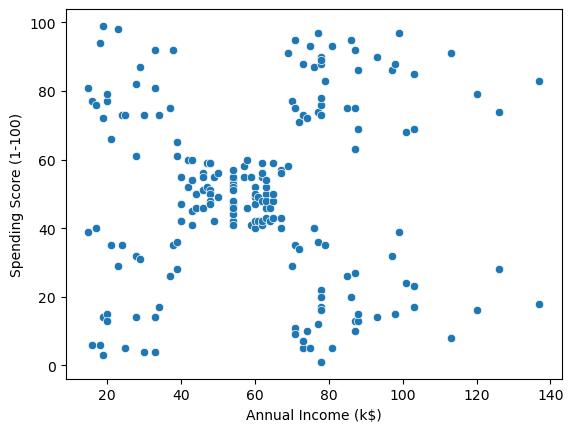

In [57]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)",data=df)
plt.show()

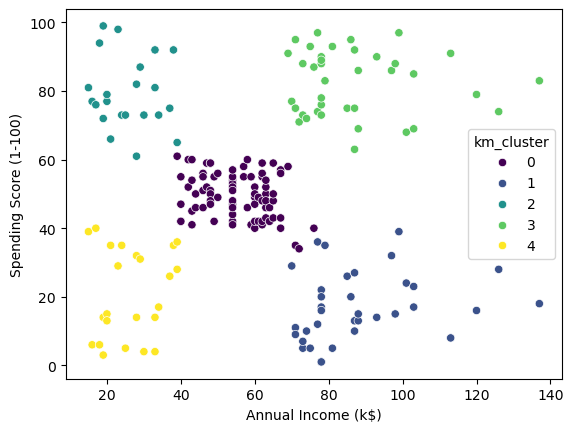

In [63]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)",data=df,hue="km_cluster",palette="viridis")
plt.show()

# **Clustering Observation**

- **Cluster 0 - (Avg income, Avg spending score) -** Can target these set of customers by providing them with low cost EMI's etc.
- **Cluster 1 - (High income, low spending score) -** Target these customers by asking the feedback and advertising the product in a better way to convert them into cluster 5 customers.
- **Cluster 2 - (low income, high spending score) -** May or may not target these group of customers based on the policy of the mall.
- **Cluster 3 - (High income, High spending score) -** Target these customers by sending new product alerts which would lead to increase in the revenue collected by the mall as they are loyal customers.
- **Cluster 4 - (low income, low spending score) -** Don't target these customers since they are less income and need to save money

In [61]:
pd.crosstab(df['km_cluster'],df["Gender"],normalize="index")

Gender,0,1
km_cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.590909,0.409091
3,0.538462,0.461538
4,0.608696,0.391304


In [62]:
df.groupby("km_cluster")[["Age","Annual Income (k$)","Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
km_cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,25.272727,25.727273,79.363636
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


# **<p style="font-family:newtimeroman;font-size:200%;text-align:center;color:#06445e;">Thank You</p>**

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">Behara Pavan Kumar</p>**